# Clustering of countries 

The steps are broadly:
1. Reading and understanding the data
2. Cleaning the data
3. Preparing the data for modelling
4. Modelling
5. Final analysis and recomendations





In [1]:
# Importing all required data libraries 
# Reading and understanding the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling data
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# for performing k-means clustering
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans

# for rescaling
from sklearn.decomposition import PCA

# for performing hirerarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# 1) Reading and understanding the dataset
country_df = pd.read_csv(r'C:\Users\vamshipeddapalli\Desktop\Data_science_IIIT\Main_course\Modules\clustering assignment\Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Basics of thecountry data frame
country_df.shape

(167, 10)

In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# 2) Cleaning the data
#Finding out missing values 
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

we can see we don\t hav e any null values here to drop or to immute.





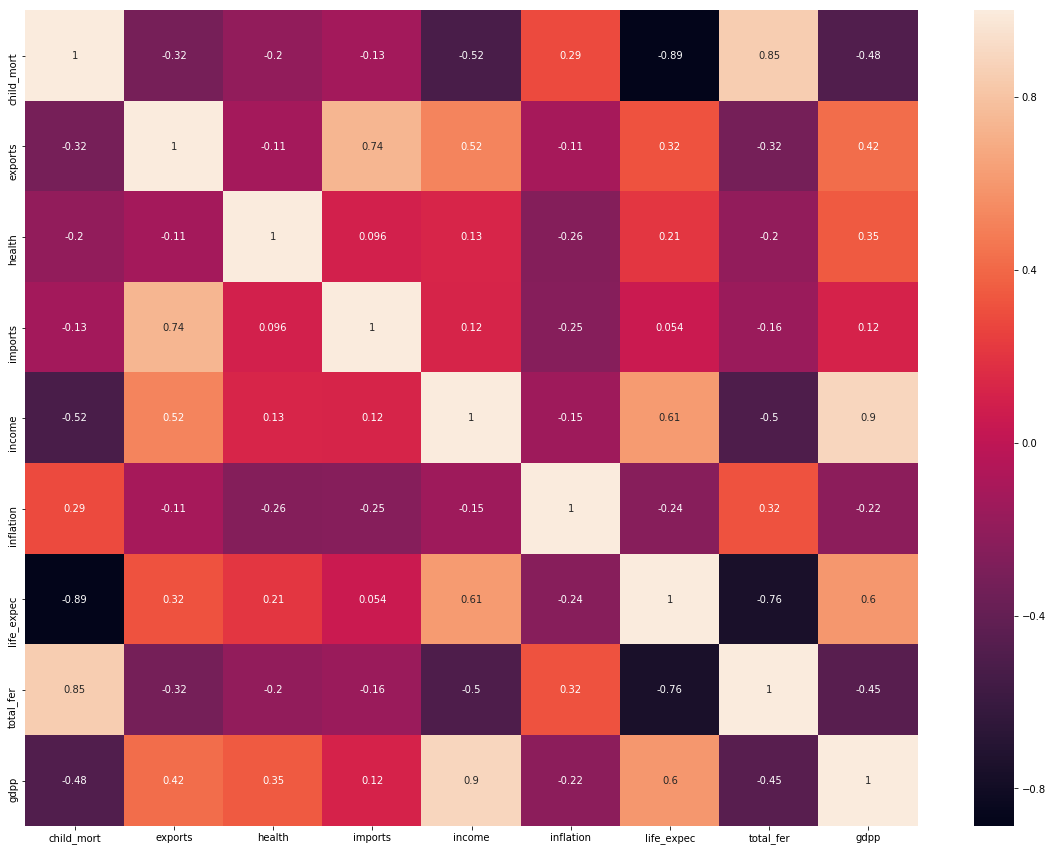

In [7]:
# 3) Preparing the data for modelling
# we need to find weather the data is highly corelated or not so that we can confirm weather the usage of PCA is valid or not 
plt.figure(figsize  =(20,15))
sns.heatmap(country_df.corr(),annot = True)


The above plot justifies highly corelated variables do exist. 

In [8]:
# Rescaling the data so that PCA can be applied, but before rescaling we need to remove columns which we don't use. 
#So we are removing country column 
df1=country_df.drop(['country'],axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# rescaling the data
df2 = StandardScaler().fit_transform(df1)
df2

O:\AAnaconda_IIIT\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
O:\AAnaconda_IIIT\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [10]:
pca = PCA(svd_solver='randomized', random_state=42)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [11]:
#Applying PCA on df2
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [12]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [13]:
#Looking at the screeplot to assess the number of needed principal components
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

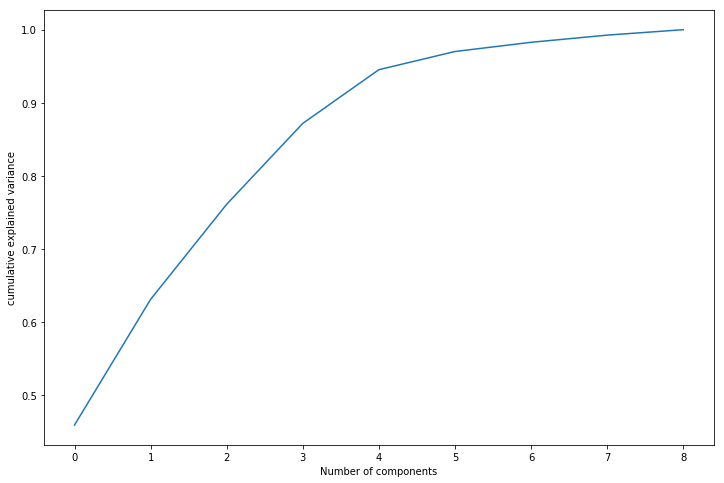

In [14]:
# scree plot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [15]:
#Looks like 3 components are enough to describe 90% of the variance in the dataset
#We'll choose 3 components for our modeling

In [16]:
# First three components are covering close to 90% of the data. 
# so we will be using those first three components for our clustering process
# getting the first three pricipal components now 
columns = list(country_df.drop('country',axis=1).columns)
principal_component_df = pd.DataFrame({ 'Feature':columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
principal_component_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.419519,0.192884,-0.029544
1,exports,0.283897,0.613163,0.144761
2,health,0.150838,-0.243087,-0.596632
3,imports,0.161482,0.671821,-0.299927
4,income,0.398441,0.022536,0.301548
5,inflation,-0.193173,-0.008404,0.642520
6,life_expec,0.425839,-0.222707,0.113919
7,total_fer,-0.403729,0.155233,0.019549
8,gdpp,0.392645,-0.046022,0.122977


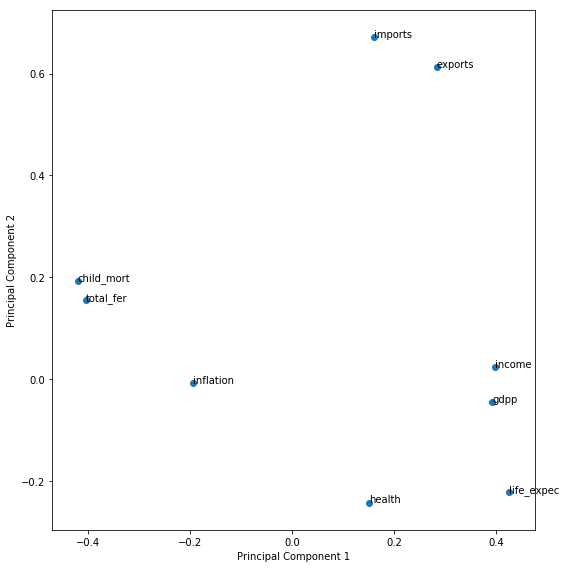

In [17]:
#Let's visualise the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(principal_component_df.PC1, principal_component_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(principal_component_df.Feature):
    plt.annotate(txt, (principal_component_df.PC1[i],principal_component_df.PC2[i]))
plt.tight_layout()
plt.show()

First pricipal component has lot of variables. second pricipal component has child morality and total fertility.

In [18]:
# First three components are covering close to 90% of the data. we are taking components = 3 , we will be using incremental PCA for efficiency
principal_component_Final = IncrementalPCA(n_components=3)

In [19]:
# now we will be projecting our original data on the first 3 PCA's
#training PCA 
PCA_train_df = principal_component_Final.fit_transform(df2)

In [20]:
# Basics of the PCA train data frame
PCA_train_df.shape



(167, 3)

In [21]:
# we will be creating new matrix. Here we will be takin the transpose of PCA matrix 
pc = np.transpose(PCA_train_df)
rownames = list(country_df['country'])
pcs_df = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pcs_df.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.917491,0.006782,1.149719
1,Albania,0.427164,-0.849421,-0.524328
2,Algeria,-0.270015,-0.176265,-1.555131
3,Angola,-2.928291,2.207142,-0.427484
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053


# outlier Analysis: performing the Outlier Analysis on the dataset





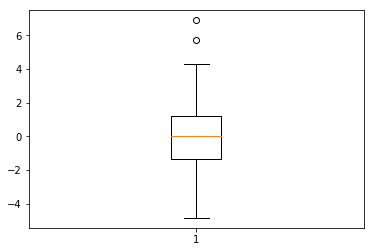

In [22]:
# Outlier Analysis on PC1
plt.boxplot(pcs_df.PC1)
Q1 = pcs_df.PC1.quantile(0.05)
Q3 = pcs_df.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df = pcs_df[(pcs_df.PC1 >= Q1) & (pcs_df.PC1 <= Q3)]



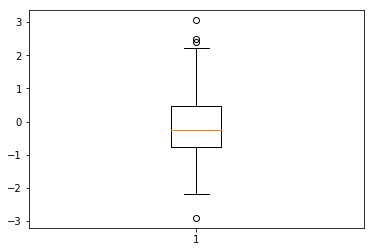

In [23]:
# Outlier Analysis on PC2
plt.boxplot(pcs_df.PC2)
Q1 = pcs_df.PC2.quantile(0.05)
Q3 = pcs_df.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df = pcs_df[(pcs_df.PC2 >= Q1) & (pcs_df.PC2 <= Q3)]

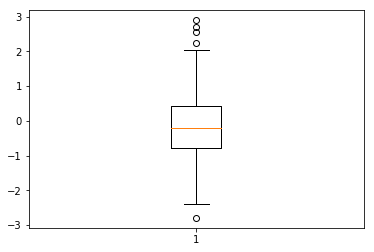

In [24]:
# Outlier Analysis on PC3
plt.boxplot(pcs_df.PC3)
Q1 = pcs_df.PC3.quantile(0.05)
Q3 = pcs_df.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df = pcs_df[(pcs_df.PC3 >= Q1 ) & (pcs_df.PC3 <= Q3)]


In [25]:
# after outlier treatment checking the data now 
pcs_df.shape
#pcs_df.head()

(119, 4)

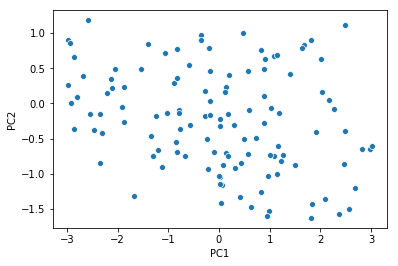

In [26]:
#using scattter plot checking the spread of the data 
sns.scatterplot(x='PC1',y='PC2',data=pcs_df)

In [27]:
# checking weather the data is suitable for clustering by using Hopkins score 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [28]:
#Let's check the Hopkins measure
hopkins(pcs_df.drop(['country'],axis=1))

0.6763614690451173

In [29]:
# Preliminary check is done, standardizing again 
from sklearn.preprocessing import StandardScaler
new_df = pcs_df
new_df1 = StandardScaler().fit_transform(new_df.drop(['country'],axis=1))
new_df1

array([[-1.86858510e+00,  3.38401319e-01,  1.83749815e+00],
       [ 2.81738143e-01, -8.55767995e-01, -5.34295133e-01],
       [-1.66487260e-01,  8.31005740e-02, -1.99473935e+00],
       [ 6.67046206e-01,  2.29477691e-01, -1.96707025e-01],
       [ 3.91445167e-02, -1.65061486e+00, -1.25688394e+00],
       [-5.74855795e-02, -6.34148294e-01, -1.43632285e+00],
       [ 1.52927505e+00, -1.86388855e+00,  4.77260913e-01],
       [ 1.92273411e+00, -5.68424732e-01,  1.64707374e+00],
       [-1.01639283e-01,  9.75338529e-02, -1.21255995e+00],
       [ 8.23289405e-01, -7.03087468e-01,  6.62344290e-01],
       [ 1.08434231e+00,  1.49326764e+00, -8.98444713e-01],
       [-7.08939451e-01, -9.24582942e-01, -1.60235603e+00],
       [ 6.99583032e-01, -7.06047266e-01,  4.12978720e-01],
       [ 3.76260899e-01,  9.65010351e-01, -1.10436908e+00],
       [ 1.34506587e-01,  8.84164713e-01, -2.08261897e-01],
       [-1.71415636e+00,  8.78412620e-01,  8.55559740e-01],
       [-1.03852700e-01,  9.68142088e-01

# K-Means clustering
## Silhouette Analysis , elbow-curve SSD



In [30]:
# 4) Modeling
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(new_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2705315160199778
For n_clusters=3, the silhouette score is 0.2999240778235065
For n_clusters=4, the silhouette score is 0.3309217635061211
For n_clusters=5, the silhouette score is 0.2904403077633728
For n_clusters=6, the silhouette score is 0.29749021955596966
For n_clusters=7, the silhouette score is 0.264212449647241
For n_clusters=8, the silhouette score is 0.2817022081525263


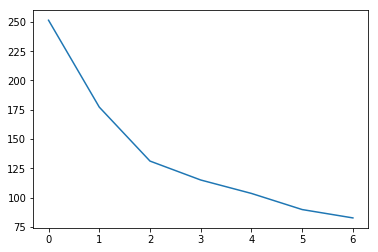

In [31]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_df1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [32]:
#Finally choosing k =5 . let's create the clusters with K =5
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(new_df1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_


array([3, 2, 4, 1, 4, 4, 0, 0, 4, 0, 1, 4, 2, 1, 1, 3, 1, 4, 0, 3, 2, 1,
       3, 0, 1, 2, 4, 3, 0, 3, 2, 1, 1, 0, 2, 2, 4, 2, 4, 1, 1, 0, 1, 3,
       2, 0, 3, 2, 2, 3, 1, 1, 0, 4, 4, 3, 2, 4, 1, 4, 3, 1, 1, 3, 2, 2,
       1, 1, 2, 3, 3, 1, 1, 0, 0, 2, 3, 3, 4, 0, 4, 1, 1, 4, 4, 2, 0, 2,
       4, 3, 2, 1, 3, 0, 1, 0, 3, 3, 2, 4, 4, 2, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 2, 0, 2, 4, 3, 1, 4, 3])

In [34]:
# assign the label
new_df['cluster_id'] = kmeans.labels_
new_df.head()

,country,PC1,PC2,PC3,cluster_id
0,Afghanistan,-2.917491,0.006782,1.149719,3
1,Albania,0.427164,-0.849421,-0.524328,2
2,Algeria,-0.270015,-0.176265,-1.555131,4
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053,1
5,Argentina,0.049829,-1.419314,-1.034342,4


In [35]:
#counting the cluster_id 
new_df['cluster_id'].value_counts()


1    27
3    26
2    26
4    22
0    18
Name: cluster_id, dtype: int64

In [36]:
#Now let's create the cluster means wrt to the various variables mentioned in the question 
combine=pd.merge(country_df,new_df,on='country')
df_all=combine[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','cluster_id']]
child_mort = pd.DataFrame(df_all.groupby(["cluster_id"]).child_mort.mean())
exports= pd.DataFrame(df_all.groupby(["cluster_id"]).exports.mean())
imports = pd.DataFrame(df_all.groupby(["cluster_id"]).imports.mean())
health = pd.DataFrame(df_all.groupby(["cluster_id"]).health.mean())
income = pd.DataFrame(df_all.groupby(["cluster_id"]).income.mean())
inflation = pd.DataFrame(df_all.groupby(["cluster_id"]).inflation.mean())         
life_expec = pd.DataFrame(df_all.groupby(["cluster_id"]).life_expec.mean())
total_fer = pd.DataFrame(df_all.groupby(["cluster_id"]).total_fer.mean())
gdpp = pd.DataFrame(df_all.groupby(["cluster_id"]).gdpp.mean())



In [37]:
# combing cluster_id with the main dataset
df_final = pd.concat([pd.Series([0,1,2,3,4]),child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp], axis=1)
df_final.columns = ["cluster_id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","gdpp"]
df_final

,cluster_id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,gdpp
0,0,6.255556,38.388889,43.333333,10.181111,29546.111111,2.600333,78.844444,1.716111,31068.333333
1,1,19.140741,59.618519,61.140741,5.762963,18914.074074,5.878519,73.414815,2.282963,10338.740741
2,2,15.707692,35.080769,44.453846,7.010769,13936.923077,3.835923,74.946154,2.167692,8679.230769
3,3,73.269231,27.853846,42.138462,6.371154,3518.769231,8.480192,60.673077,4.703077,1798.692308
4,4,36.550000,26.712273,29.204545,4.775000,9082.272727,12.345000,70.509091,2.755000,3896.000000


In [38]:
# From the given data we can say that for the development of the country good references from the given data set are 
# child_Mortality, Gdpp, Income, Inflation. Let's visualize the data by using these four components

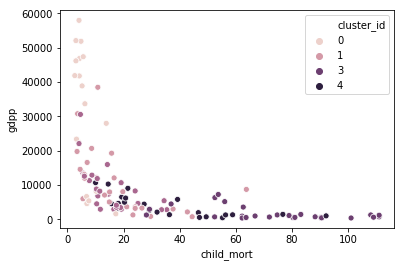

In [39]:
 # visualisation using  two of the original variables (like gdpp, child_mort, etc.) 
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',data=df_all)

# child Mortality rate is very high in the countries which has low gdpp



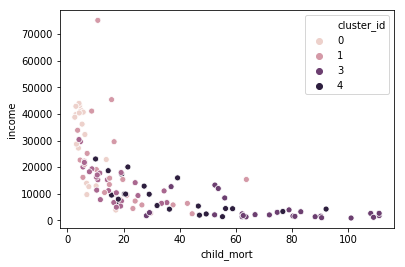

In [40]:
#visualisation using  two of the original variables -Child_Mortality and Income
sns.scatterplot(x='child_mort',y='income',hue='cluster_id',data=df_all)

child Mortality rate is very high in the countries which has low income

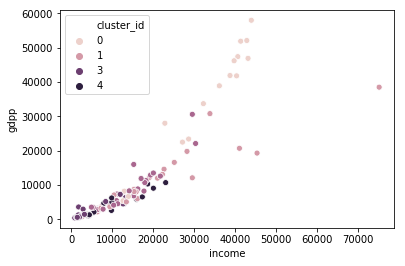

In [41]:
#visualisation using  two of the original variables -gdpp and Income
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',data=df_all)

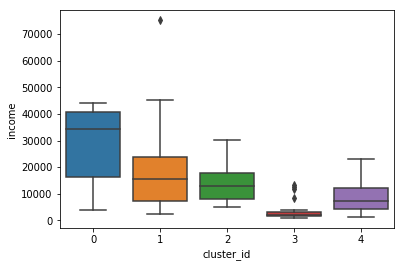

In [42]:
# box plot - -cluster_id and Income
sns.boxplot(x='cluster_id', y='income', data=df_all)

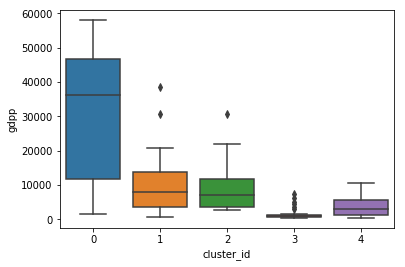

In [43]:
# box plot - -cluster_id and gdpp
sns.boxplot(x='cluster_id', y='gdpp', data=df_all)

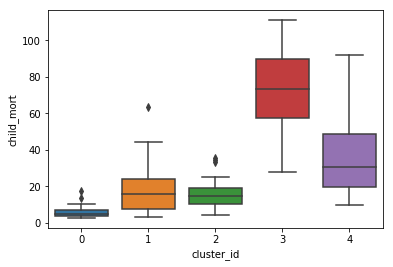

In [44]:
# box plot - -cluster_id and child mortality
sns.boxplot(x='cluster_id', y='child_mort', data=df_all)

# By considering child mortality, gdpp and income we can clearly say that cluster id 1 are the countries that we need to focus much on.Below is the list of countries 

In [45]:
# List of countries that needs to be focused on 
df_all[df_all['cluster_id']==1].sort_values(['income','child_mort'])

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id
21,Cambodia,44.4,54.1,59.5,5.68,2520,3.120,66.1,2.88,786,1
62,Kyrgyz Republic,29.6,51.6,81.7,6.18,2790,10.000,68.5,3.10,880,1
116,Vietnam,23.3,72.0,80.2,6.84,4490,12.100,73.1,1.95,1310,1
24,Cape Verde,26.5,32.7,61.8,4.09,5830,0.505,72.5,2.67,3310,1
50,Guyana,37.6,51.4,79.1,5.38,5840,5.730,65.5,2.65,3040,1
16,Bhutan,42.7,42.5,70.7,5.20,6420,5.990,72.1,2.38,2180,1
82,Paraguay,24.1,55.1,51.5,5.87,7290,6.100,74.1,2.73,3230,1
40,Fiji,24.1,57.8,63.9,4.86,7350,4.230,65.3,2.67,3650,1
14,Belize,18.8,58.2,57.5,5.20,7880,1.140,71.4,2.71,4340,1
58,Jordan,21.1,48.3,69.0,8.04,9470,8.430,75.8,3.66,3680,1


In [46]:
# choosing Top 10 List of countries that need to be focused on  based on income, child mortality using Hierarchical clustering
df_all[df_all['cluster_id']==1].sort_values(['income','child_mort']).head(10)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id
21,Cambodia,44.4,54.1,59.5,5.68,2520,3.120,66.1,2.88,786,1
62,Kyrgyz Republic,29.6,51.6,81.7,6.18,2790,10.000,68.5,3.10,880,1
116,Vietnam,23.3,72.0,80.2,6.84,4490,12.100,73.1,1.95,1310,1
24,Cape Verde,26.5,32.7,61.8,4.09,5830,0.505,72.5,2.67,3310,1
50,Guyana,37.6,51.4,79.1,5.38,5840,5.730,65.5,2.65,3040,1
16,Bhutan,42.7,42.5,70.7,5.20,6420,5.990,72.1,2.38,2180,1
82,Paraguay,24.1,55.1,51.5,5.87,7290,6.100,74.1,2.73,3230,1
40,Fiji,24.1,57.8,63.9,4.86,7350,4.230,65.3,2.67,3650,1
14,Belize,18.8,58.2,57.5,5.20,7880,1.140,71.4,2.71,4340,1
58,Jordan,21.1,48.3,69.0,8.04,9470,8.430,75.8,3.66,3680,1


# Hierarchical Clustering

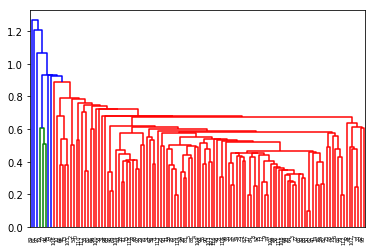

In [47]:
# Let's try Hierarchical clusterung with single linkage
mergings = linkage(new_df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

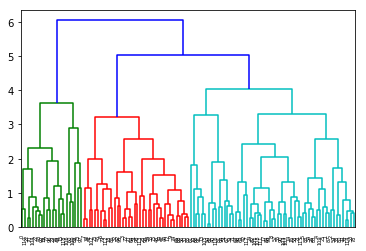

In [48]:
#single linkage is not working as expected, lets go with complete linkage
#complete linkage 
mergings = linkage(new_df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [49]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 2, 3, 1, 0, 1, 1, 2, 0, 2, 1,
       0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 3, 3, 2, 1, 0,
       2, 2, 1, 2, 2, 0, 3, 3, 2, 1, 1, 1, 2, 1, 1, 1, 4, 3, 3, 1, 2, 2,
       3, 3, 2, 1, 0, 3, 2, 4, 2, 2, 0, 0, 1, 2, 1, 3, 1, 1, 1, 2, 2, 1,
       1, 4, 1, 3, 0, 2, 3, 2, 0, 4, 2, 1, 4, 1, 2, 1, 0, 3, 4, 1, 1, 1,
       0, 1, 2, 2, 1, 1, 3, 1, 0])

In [50]:
# assign cluster labels (Hierarchical Clustering)
df_all['cluster_labels'] = cluster_labels
df_all.head()


O:\AAnaconda_IIIT\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,44.9,7.58,1610,9.44,56.2,5.82,553,3,0
1,Albania,16.6,28.0,48.6,6.55,9930,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,38.4,31.4,4.17,12900,16.10,76.5,2.89,4460,4,1
3,Antigua and Barbuda,10.3,45.5,58.9,6.03,19100,1.44,76.8,2.13,12200,1,2
4,Argentina,14.5,18.9,16.0,8.10,18700,20.90,75.8,2.37,10300,4,1


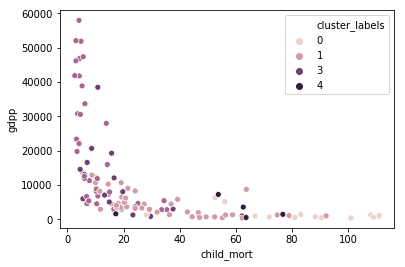

In [51]:
 # visualisation using  two of the original variables (like gdpp, child_mort, etc.) using Hierarchical clustering
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_labels',data=df_all)

child Mortality rate is very high in the countries which has low income and most of the countries lie in cluster 1 

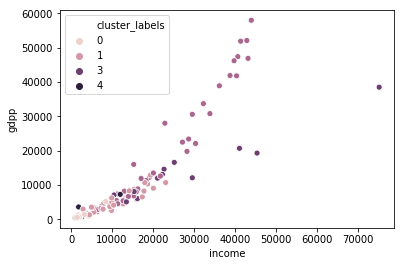

In [52]:
#visualisation using  two of the original variables -gdpp and Income  using Hierarchical clustering
sns.scatterplot(x='income',y='gdpp',hue='cluster_labels',data=df_all)

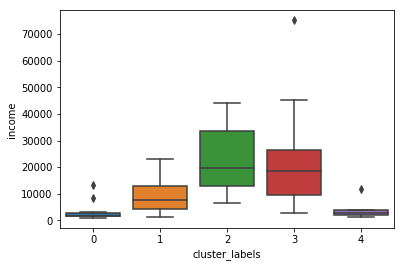

In [53]:
# box plot - -cluster_id and Income using Hierarchical clustering
sns.boxplot(x='cluster_labels', y='income', data=df_all)

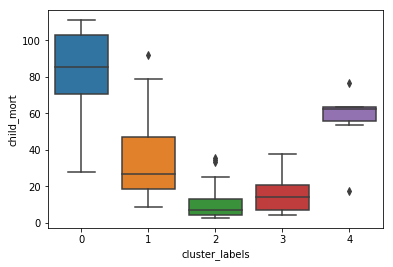

In [54]:
# box plot - -cluster_id and child mortality using Hierarchical clustering
sns.boxplot(x='cluster_labels', y='child_mort', data=df_all)

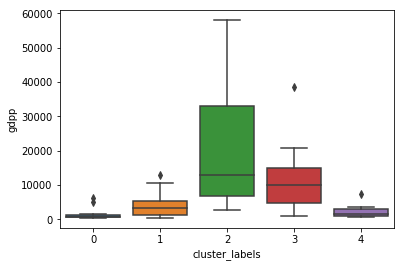

In [55]:
# box plot - -cluster_id and gdpp using Hierarchical clustering
sns.boxplot(x='cluster_labels', y='gdpp', data=df_all)

## By considering child mortality, gdpp and income we can clearly say that cluster id = 0 are the countries that we need to focus much on.Below is the list of countries



In [56]:
# Top 10 List of countries that need to be focused on  based on income, child mortality using Hierarchical clustering 
df_all[df_all['cluster_labels']==0].sort_values(['income','child_mort']).head(10)


,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
76,Mozambique,101.0,31.5,46.2,5.21,918,7.640,54.5,5.56,419,3,0
70,Malawi,90.5,22.8,34.9,6.59,1030,12.100,53.1,5.31,459,3,0
49,Guinea,109.0,30.3,43.2,4.93,1190,16.100,58.0,5.34,648,3,0
27,Comoros,88.2,16.5,51.7,4.51,1410,3.870,65.9,4.75,769,3,0
110,Uganda,81.0,17.1,28.6,9.01,1540,10.600,56.8,6.15,595,3,0
0,Afghanistan,90.2,10.0,44.9,7.58,1610,9.440,56.2,5.82,553,3,0
43,Gambia,80.3,23.8,42.7,5.69,1660,4.300,65.5,5.71,562,3,0
96,Solomon Islands,28.1,49.3,81.2,8.55,1780,6.810,61.7,4.24,1290,3,0
15,Benin,111.0,23.8,37.2,4.10,1820,0.885,61.8,5.36,758,3,0
104,Tanzania,71.9,18.7,29.1,6.01,2090,9.250,59.3,5.43,702,3,0


## By looking Hirerachial and K means clustering the top 5 countries which are in direct need of aid from the analysis are 
1. MozambiquE
2. Malawi
3. GuineA
4. Comoros 
5. Uganda